## Multiple Linear Regression and Polynomial Regression

In [388]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [389]:
import pandas as pd
df = pd.read_csv('/Users/elliott/Documents/Personal_Projects/calls_weather_week.csv')

Here we need to find and remove any null values to avoid issues when plotting. 

In [488]:
df.isna().sum()

Date                0
Maximum             0
Minimum             0
Average             0
Precipitation       0
Weekday             0
weekday_num         0
Dispatched_calls    0
Holidays            0
dtype: int64

In [489]:
df['Precipitation']=df["Precipitation"].fillna(df['Precipitation'].mean())

In [490]:
df.isna().sum()

Date                0
Maximum             0
Minimum             0
Average             0
Precipitation       0
Weekday             0
weekday_num         0
Dispatched_calls    0
Holidays            0
dtype: int64

In [491]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays
0,2016-09-01,0.345455,0.611111,0.438202,0.0,Thursday,0.500000,347,0
1,2016-09-02,0.400000,0.527778,0.438202,0.0,Friday,0.666667,401,0
2,2016-09-03,0.309091,0.583333,0.404494,0.0,Saturday,0.833333,341,0
3,2016-09-04,0.327273,0.555556,0.404494,0.0,Sunday,1.000000,317,0
4,2016-09-05,0.418182,0.472222,0.426966,0.0,Monday,0.000000,328,1


Now let's set up our variables. Z will be the independent variable set, and y will be our dependent variable. 

In [492]:
lst = ['Maximum','Minimum', 'Average','Precipitation','weekday_num','Holidays']

In [493]:
for x in lst:
     df[str(x)]=(df[str(x)]-df[str(x)].min())/(df[str(x)].max()-df[str(x)].min())

In [494]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays
0,2016-09-01,0.345455,0.611111,0.438202,0.0,Thursday,0.500000,347,0.0
1,2016-09-02,0.400000,0.527778,0.438202,0.0,Friday,0.666667,401,0.0
2,2016-09-03,0.309091,0.583333,0.404494,0.0,Saturday,0.833333,341,0.0
3,2016-09-04,0.327273,0.555556,0.404494,0.0,Sunday,1.000000,317,0.0
4,2016-09-05,0.418182,0.472222,0.426966,0.0,Monday,0.000000,328,1.0


In [495]:
Z= df[['Maximum','Minimum','Average','Precipitation','weekday_num']]
y = df['Dispatched_calls']


Let's reshape the arrays to assist with plotting. 

In [496]:
# This is not quite working, need to explore this further

Z = Z.values.reshape(-1,5)
y = y.values.reshape(-1,1)

In [497]:
lm = LinearRegression()
lm.fit(Z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [498]:
Z.ndim

2

In [499]:
y.ndim

2

In [500]:
YhatMLE = lm.predict(Z)

In [501]:
import seaborn as sns

In [502]:
YhatMLE

array([[355.57023123],
       [364.74410951],
       [353.97487279],
       ...,
       [352.78932166],
       [356.17404455],
       [347.44401797]])

In [503]:
y

array([[347],
       [401],
       [341],
       ...,
       [380],
       [389],
       [378]])

(0, 658.5389229139073)

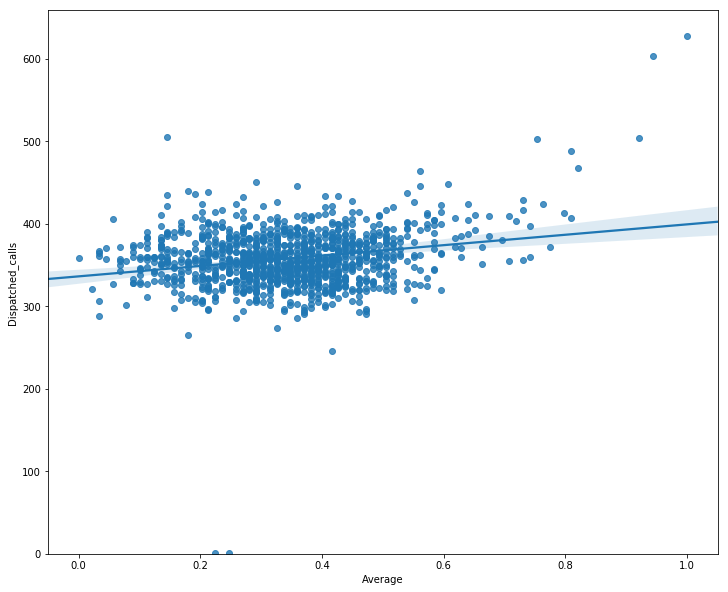

In [504]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Average", y="Dispatched_calls", data=df)
plt.ylim(0,)

This might be more of a polynomial fit, so let's try it. 

The following code is for a third degree polynomial fit for our linear regression prediction based on average temperature for a day, against call volume. The data may be better fit for a second degree polynomial, as call volume would most-likely increase with a further drop in temperature than what is represented in this data. However, the second degree polynomial fit seemed to underestimate the data at our highest temperatures. There is a bit of guess work here, because our data only has a few points at a temperature above 80 degress, but when this is the case, we see a tremendous spike in call volume. 

In [505]:
from sklearn.preprocessing import PolynomialFeatures

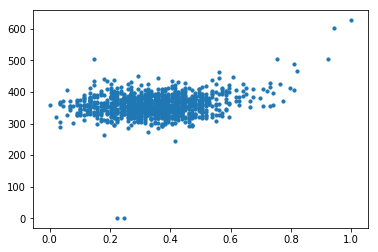

In [506]:
x = df['Average']
plt.scatter(x,y, s=10)

In [507]:
pr = PolynomialFeatures(degree=3)
x_poly = pr.fit_transform(df[['Average']])
# x_poly= pr.fit_transform(df[['Maximum','Average','Precipitation','weekday_num']])


In [508]:
model = LinearRegression()
model.fit(x_poly, y)
pred = model.predict(x_poly)

In [509]:
new_X, new_y = zip(*sorted(zip(x,pred)))

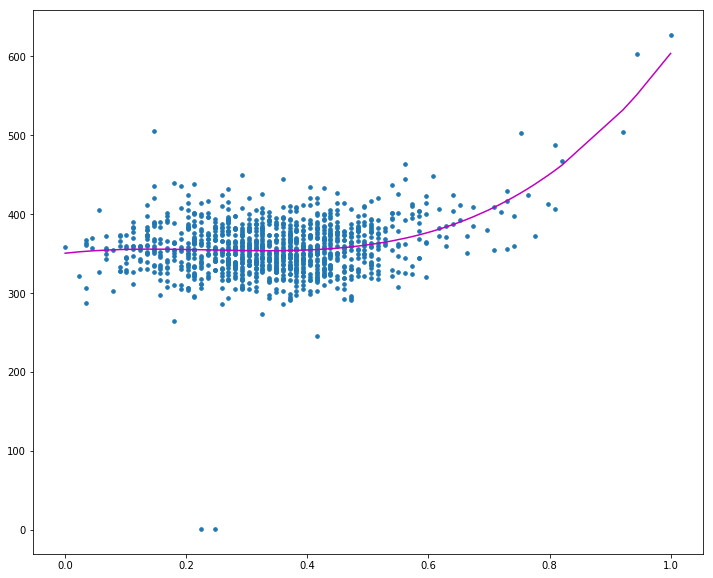

In [510]:
width = 12
height = 10
plt.figure(figsize=(width, height))
plt.scatter(x,y, s = 13)
plt.plot(new_X, new_y, color='m')
plt.show()

In [511]:
Max_poly= pr.fit_transform(df[['Maximum']])
Day_poly= pr.fit_transform(df[['weekday_num']])
Min_poly= pr.fit_transform(df[['Minimum']])
Rain_poly= pr.fit_transform(df[['Precipitation']])

In [512]:
model = LinearRegression()
model.fit(Max_poly, y)
pred = model.predict(Max_poly)

modelDay = LinearRegression()
modelDay.fit(Day_poly, y)
predDay = modelDay.predict(Day_poly)

modelMin = LinearRegression()
modelMin.fit(Min_poly, y)
predMin = modelMin.predict(Min_poly)

Rainmodel = LinearRegression()
Rainmodel.fit(Rain_poly, y)
Rainpred = Rainmodel.predict(Rain_poly)

In [513]:
new_Xs, new_ys = zip(*sorted(zip(x,pred)))

Day_X, Day_y = zip(*sorted(zip(x,predDay)))

Min_X, Min_y = zip(*sorted(zip(x,predMin)))

Rain_X, Rain_y = zip(*sorted(zip(x,Rainpred)))

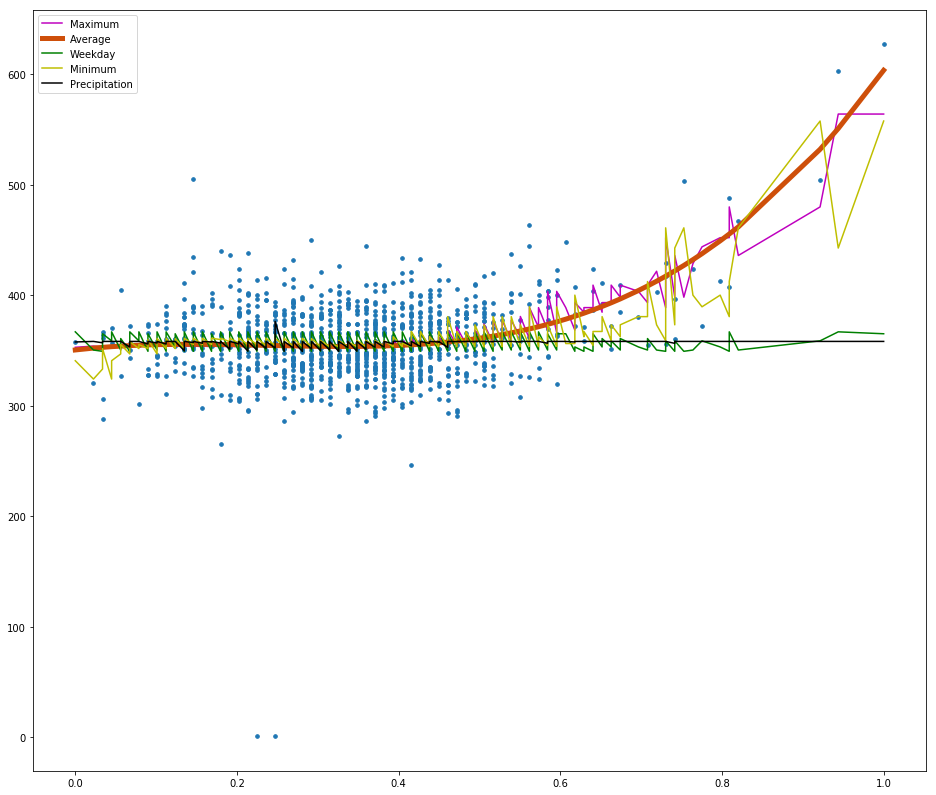

In [514]:
width = 16
height = 14
plt.figure(figsize=(width, height))
plt.scatter(x,y, s = 13)
plt.plot(new_Xs, new_ys, color='m',label='Maximum')
plt.plot(new_X, new_y, color='#CE4F0A', label='Average', linewidth = 5.0)
plt.plot(Day_X, Day_y, color='g',label='Weekday')
plt.plot(Min_X, Min_y, color='y',label='Minimum')
plt.plot(Rain_X, Rain_y, color='black',label='Precipitation')
plt.legend()
plt.show()


(0, 658.5389229139073)

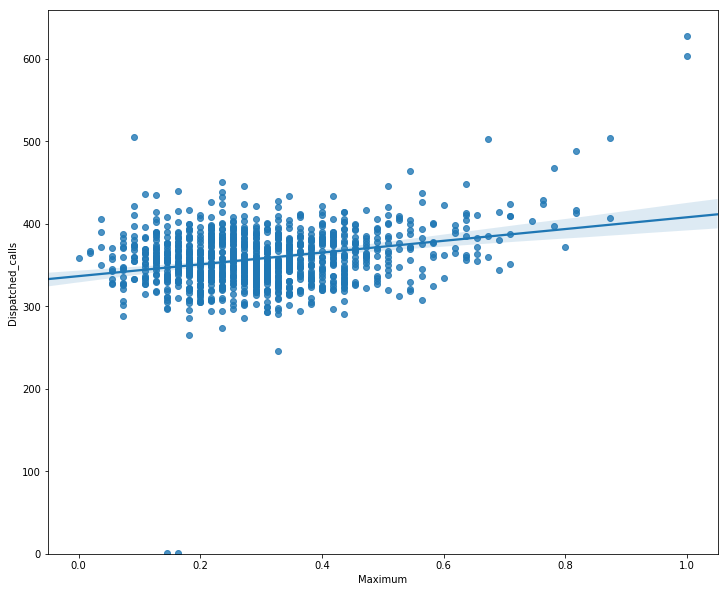

In [515]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Maximum", y="Dispatched_calls", data=df)
plt.ylim(0,)

(0, 658.5389229139073)

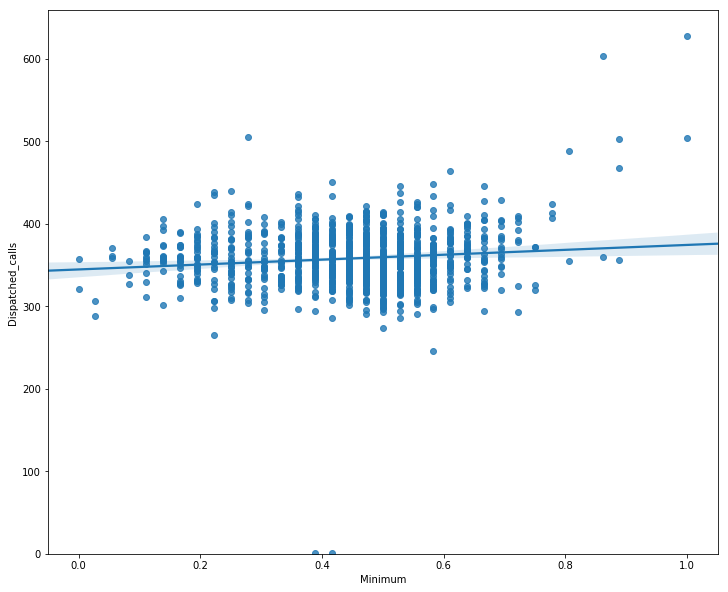

In [516]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Minimum", y="Dispatched_calls", data=df)
plt.ylim(0,)

(0, 658.5389229139073)

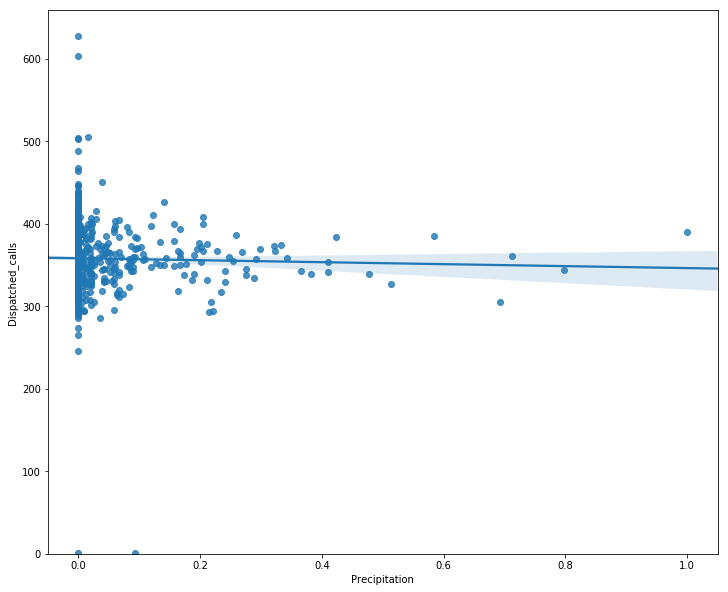

In [517]:

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Precipitation", y="Dispatched_calls", data=df)
plt.ylim(0,)

In [518]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays
0,2016-09-01,0.345455,0.611111,0.438202,0.0,Thursday,0.500000,347,0.0
1,2016-09-02,0.400000,0.527778,0.438202,0.0,Friday,0.666667,401,0.0
2,2016-09-03,0.309091,0.583333,0.404494,0.0,Saturday,0.833333,341,0.0
3,2016-09-04,0.327273,0.555556,0.404494,0.0,Sunday,1.000000,317,0.0
4,2016-09-05,0.418182,0.472222,0.426966,0.0,Monday,0.000000,328,1.0


(0, 658.5389229139073)

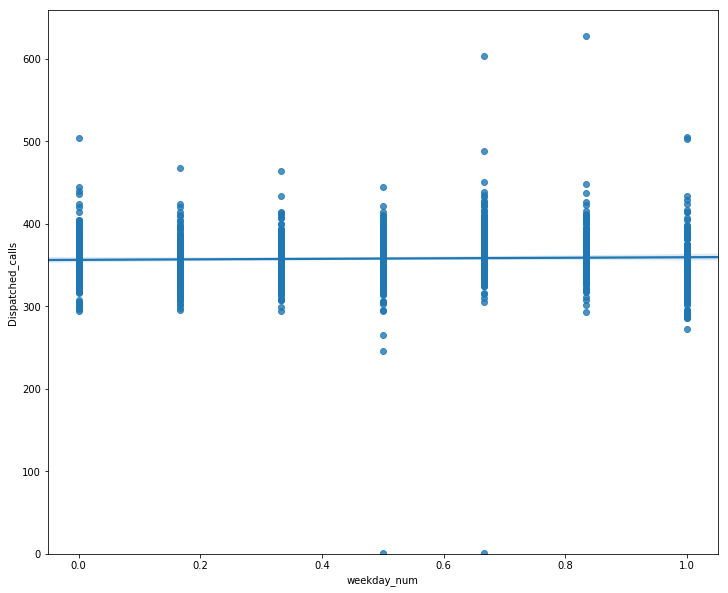

In [519]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="weekday_num", y="Dispatched_calls", data=df)
plt.ylim(0,)

In [520]:
df['Dispatched_calls'].max()

627

In [521]:
df.describe()

,Maximum,Minimum,Average,Precipitation,weekday_num,Dispatched_calls,Holidays
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.300331,0.448272,0.344449,0.021038,0.500444,357.792000,0.027556
std,0.142627,0.142672,0.134562,0.076224,0.333592,35.936026,0.163768
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.200000,0.361111,0.258427,0.000000,0.166667,336.000000,0.000000
50%,0.290909,0.472222,0.337079,0.000000,0.500000,357.000000,0.000000
75%,0.381818,0.527778,0.426966,0.000000,0.833333,378.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,627.000000,1.000000


Mean Squared Error


In [522]:
from sklearn.metrics import mean_squared_error

In [523]:
mean_squared_error(y, YhatMLE)

1168.6922029237908

Now the R^2 error of our multiple linear regression. 

In [524]:
lm.score(Z,y)

0.09421264086608483

In [525]:
lm.coef_

array([[ 81.74339801, -50.70002745,  30.00770677,  22.16614414,
          2.9408712 ]])

Evaluate the polynomial regression of Max Temp

In [526]:
mean_squared_error(y, pred)

1073.8533039790757

In [527]:
model.score(Max_poly,y)

0.1677169182142102

Falk and Miller(1992) suggest R^2 above .10 is significant. -- IBM Data Analysis and Python, Week 4, Prediction and Decision Making

In [528]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [529]:
cal = USFederalHolidayCalendar()

In [530]:
df['Date']=pd.to_datetime(df['Date'])

In [531]:
dr = df['Date']

In [532]:
holidays = cal.holidays(start = dr.min(), end = dr.max())

In [533]:
holidays

DatetimeIndex(['2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24',
               '2016-12-26', '2017-01-02', '2017-01-16', '2017-02-20',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-10-09',
               '2017-11-10', '2017-11-23', '2017-12-25', '2018-01-01',
               '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22',
               '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
               '2019-05-27', '2019-07-04', '2019-09-02'],
              dtype='datetime64[ns]', freq=None)

In [534]:
df['Holidays']=df['Date'].isin(holidays) 

In [535]:
df[['Holidays']]=df[['Holidays']].astype(int)

In [536]:
df.head()

,Date,Maximum,Minimum,Average,Precipitation,Weekday,weekday_num,Dispatched_calls,Holidays
0,2016-09-01,0.345455,0.611111,0.438202,0.0,Thursday,0.500000,347,0
1,2016-09-02,0.400000,0.527778,0.438202,0.0,Friday,0.666667,401,0
2,2016-09-03,0.309091,0.583333,0.404494,0.0,Saturday,0.833333,341,0
3,2016-09-04,0.327273,0.555556,0.404494,0.0,Sunday,1.000000,317,0
4,2016-09-05,0.418182,0.472222,0.426966,0.0,Monday,0.000000,328,1
